In [1]:
#Import Library
import pandas as pd

In [2]:
#Data preparation
df = pd.read_csv("Drug.csv")

In [4]:
#Cek dimensi data
df.shape

(200, 7)

In [5]:
#Menampilkan 5 data teratas
df.head(5)

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61,F,LOW,HIGH,0.559294,0.030998,drugY


In [6]:
df.tail(5)

,Age,Sex,BP,Cholesterol,Na,K,Drug
195,56,F,LOW,HIGH,0.848774,0.073380,drugC
196,16,M,LOW,HIGH,0.743021,0.061886,drugC
197,52,M,NORMAL,HIGH,0.549945,0.055581,drugX
198,23,M,NORMAL,NORMAL,0.784520,0.055959,drugX
199,40,F,LOW,NORMAL,0.683503,0.060226,drugX


In [7]:
# import library
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
#Cek tipe data
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na             float64
K              float64
Drug            object
dtype: object

In [9]:
#statistik dasar
df.describe()

,Age,Na,K
count,200.000000,200.000000,200.000000
mean,44.315000,0.697095,0.050174
std,16.544315,0.118907,0.017611
min,15.000000,0.500169,0.020022
25%,31.000000,0.583887,0.035054
50%,45.000000,0.721853,0.049663
75%,58.000000,0.801494,0.066000
max,74.000000,0.896056,0.079788


In [12]:
#Menggunakan batas_atas dan batas_bawah
q1 = df.select_dtypes(exclude=['object']).quantile(0.25)
q3 = df.select_dtypes(exclude=['object']).quantile(0.75)

In [18]:
outlier_filter = (df.select_dtypes(exclude=['object']) < batas_bawah) | (df.select_dtypes(exclude=['object']) > batas_atas)

In [21]:
q1 = df.select_dtypes(exclude="object").quantile(0.25)
q3 = df.select_dtypes(exclude="object").quantile(0.75)
iqr = q3-q1
iqr

Age    27.000000
Na      0.217607
K       0.030947
dtype: float64

In [22]:
batas_atas = q3 + 1.5 * iqr
batas_atas

Age    98.500000
Na      1.127905
K       0.112420
dtype: float64

In [23]:
# Cek Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na           200 non-null    float64
 5   K            200 non-null    float64
 6   Drug         200 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ KB


In [24]:
# Missing values (Menghasilkan DataFrame dengan nilai boolean, di mana setiap elemen adalah True jika nilai pada posisi tersebut adalah null (kosong), dan False jika ada nilai)
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na             0
K              0
Drug           0
dtype: int64

In [25]:
# Fitur Selection
X= df.iloc[:, [3,4]].values

In [27]:
#Model K-means
X = df.select_dtypes(exclude=['object']).values

In [28]:
#Diasumsikan bahwa jumlah maksimal cluster yang mungkin ada dalam dataset adalah 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [29]:
#Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

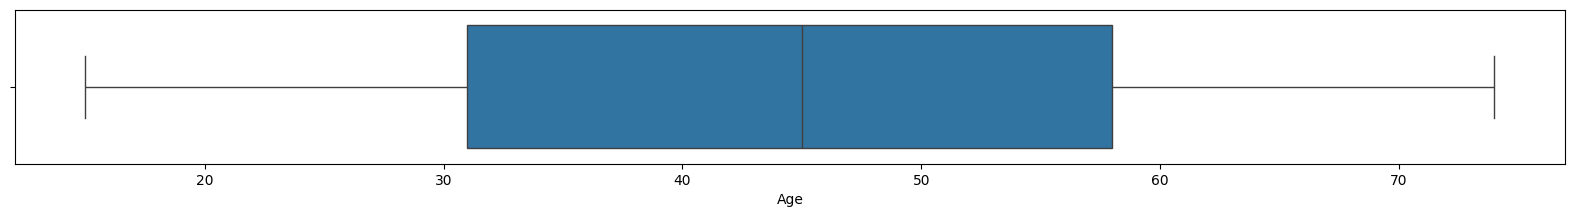

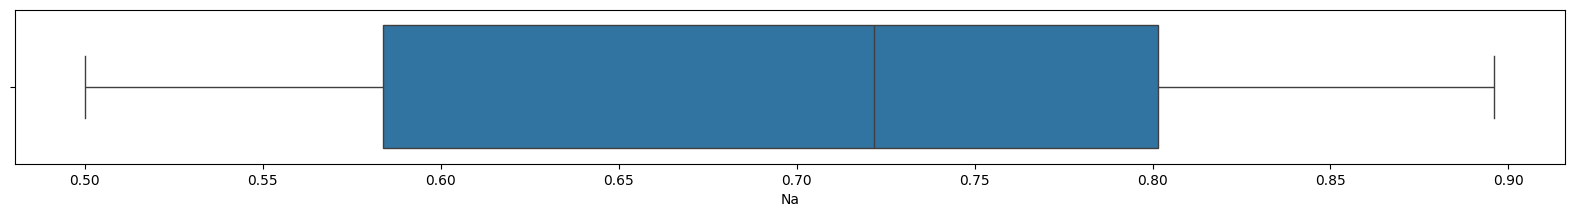

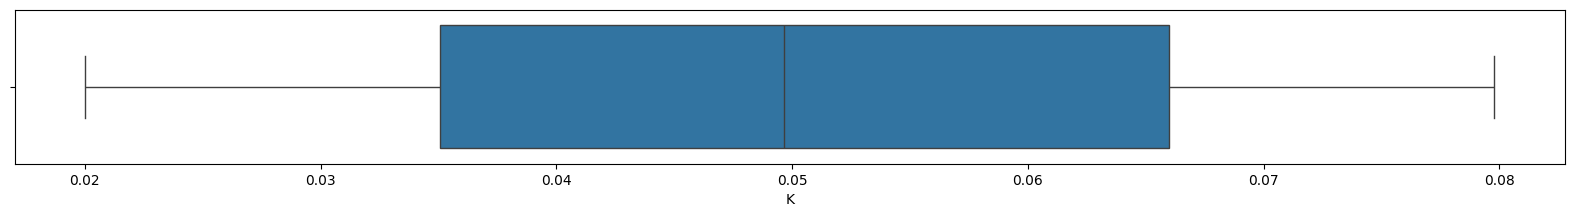

In [30]:
# Mencari Outliers - Boxplot
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

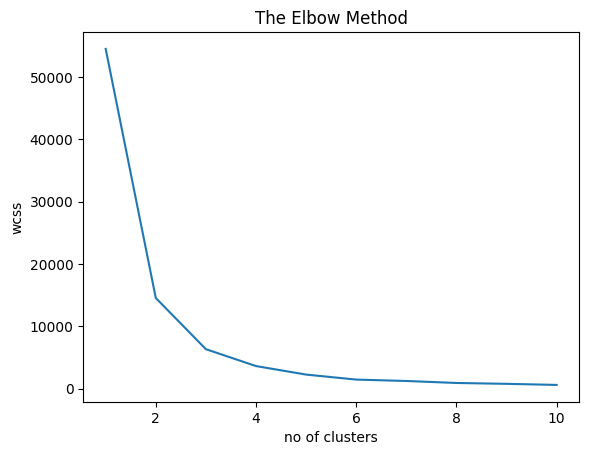

In [31]:
# Visualisasi ELBOW
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [32]:
# Pada plot ini, akan ada titik di mana kurva mulai menurun dengan lebih lambat, 
# membentuk sudut (mirip seperti siku atau "elbow"). Sudut terakhir dari kurva ini muncul ketika k=5, 
# yang menunjukkan bahwa 5 adalah jumlah optimal cluster.

# Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

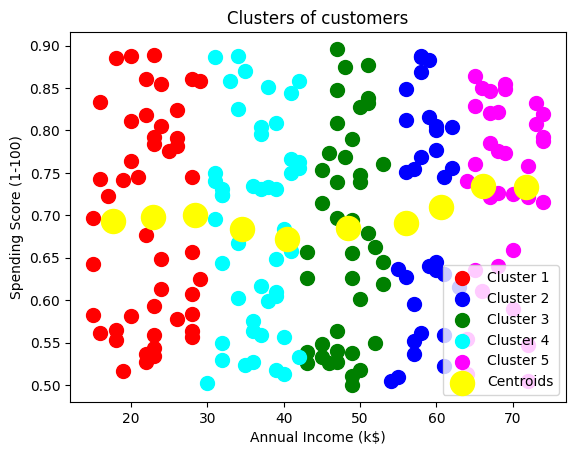

In [33]:
# Visualiasi semua clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()